# Week 4 Quiz

## Qi Meng - qm2162

### Due Sunday Oct 10th 11:59pm ET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

We're going to calculate the 95% confidence interval for the mean value of 'magnesium' from our wine dataset.

In [2]:
# Read in ../data/wine_dataset.csv as df
df = pd.read_csv(r"../data/wine_dataset.csv")

# print .info() on df for a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

(80.0, 110.0)

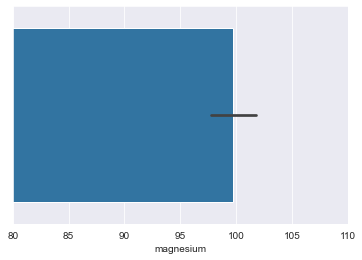

In [7]:
# Generate a barplot of the 'magnesium' column with 95% confidence intervals using sns.barplot()
# These are the CI values we're going to calculate below.
# Capture the axis of the plot in ax
ax = sns.barplot(x="magnesium", data=df, ci=95)

# To zoom in, set the xlimits using ax.set_xlim(80,110)
ax.set_xlim(80,110)

In [8]:
# Assign the mean value of magnesium to variable observed_mean
observed_mean = df.magnesium.mean()

# Print the observed mean with a precision of 2
print("{:.2f}".format(observed_mean))

99.74


In [14]:
# generate a bootstrap sample of df.magnesium (with the same number of values as the original dataset)
#   using .sample() (with replacement) 
#   using random_state=123 so our answers will match
#   assign the result to sample
sample = df.magnesium.sample(n=len(df.magnesium), replace=True, random_state=123)

# Print the mean of the sample with a precision of 2
# Note: if the sample mean is the same as the observed mean, 
#       check, are you sampling with replacement?
print("{:.2f}".format(sample.mean()))

98.69


In [19]:
# Generate 1000 additional sample means using bootstrap sampling from the 'magnesium' column
#   each sample should have the same number of values as the original dataframe
#   sample with replacement
#   do not use random_state for this step (your results may differ from the course solution slightly)
#   store in the list sample_means
sample_means = [df.magnesium.sample(n=len(df.magnesium), replace=True).mean() for i in range(1000)]

    
# Print the first 5 values in sample_means
print(sample_means[:5])

[99.78651685393258, 97.9438202247191, 99.51123595505618, 99.15730337078652, 99.74157303370787]


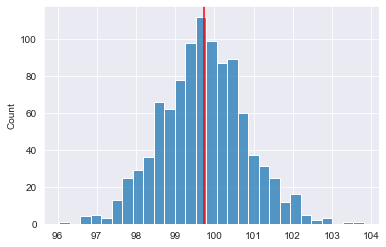

In [21]:
# Plot the distribution of sample means using sns.histplot
# Store the returned axis in ax
ax = sns.histplot(x=sample_means)

# Add a vertical line located at the observed mean on the x-axis using ax.axvline()
#   Set the color of the line to 'red'
# The observed_mean should fall near the center of the distribution.
ax.axvline(x=observed_mean, color="red")

In [22]:
# To get the 95% confidence interval, we want to retain the central 95% of our sample_means.
# To do this we need to first determine how many values must be trimmed from the ends of the sorted array.
# For 95% CI, we want to trim 1/2 of 5% from each end.
# Calculate 2.5% of the length of sample_means and store as trim_amount.
trim_amount = 0.025 * len(sample_means)

# print the trim_amount, the number of elements we'll trim from each end of the sorted list
trim_amount

25.0

In [23]:
# We want to index into our sample_means, but trim_amount is a float.
# We must be first round this value and converted to an integer.
# Use np.round() to round and int() to convert to int and store the result in trim_idx.
trim_idx = int(np.round(trim_amount))

# Print trim_idx
trim_idx

25

[ 97.63483146 101.98876404]


(80.0, 110.0)

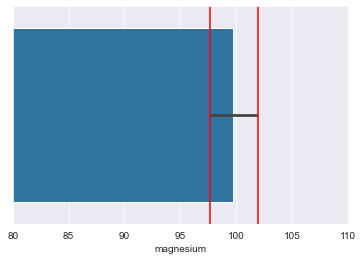

In [27]:
# We can now print the 95% CI for our measure by indexing into the sorted array of sample_means.
# Use np.sort() to return a sorted numpy array 
#   then use a list of the indices we want, [trim_idx,-trim_idx-1], to use "fancy indexing" on this sorted array.
# Store the 95% CI values as ci
ci = np.sort(sample_means)[[trim_idx,-trim_idx]]

# Print the ci values and visually compare the endpoints of the CI in the barplot above.
print(ci)

ax = sns.barplot(x="magnesium", data=df, ci=95)
ax.axvline(ci.min(), color="red")
ax.axvline(ci.max(), color="red")
ax.set_xlim(80, 110)